# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
#Ratioanle check
import json
url = "https://api.openweathermap.org/data/2.5/weather?"
city = cities[0]
city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
response = requests.get(city_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 12.65,
        "lon": 54.0333
    },
    "dt": 1713323223,
    "id": 75427,
    "main": {
        "feels_like": 32.03,
        "grnd_level": 1009,
        "humidity": 78,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 28.1,
        "temp_max": 28.1,
        "temp_min": 28.1
    },
    "name": "Hadibu",
    "sys": {
        "country": "YE",
        "sunrise": 1713319806,
        "sunset": 1713364575
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 175,
        "gust": 3.69,
        "speed": 2.94
    }
}


In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hadibu
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | colonia
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | severo-yeniseyskiy
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | ola
Processing Record 10 of Set 1 | mogadishu
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bikenibeu village
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | almodovar
Processi

Processing Record 39 of Set 4 | glencoe
Processing Record 40 of Set 4 | 'ain deheb
Processing Record 41 of Set 4 | ebon
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | chiili
City not found. Skipping...
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | yakeshi
Processing Record 46 of Set 4 | santa ana
Processing Record 47 of Set 4 | igarka
Processing Record 48 of Set 4 | carauari
Processing Record 49 of Set 4 | tazovsky
Processing Record 50 of Set 4 | santa terezinha
Processing Record 1 of Set 5 | berber
Processing Record 2 of Set 5 | utrik
Processing Record 3 of Set 5 | weno
Processing Record 4 of Set 5 | cobram
Processing Record 5 of Set 5 | ouani
Processing Record 6 of Set 5 | maqat
Processing Record 7 of Set 5 | ahau
City not found. Skipping...
Processing Record 8 of Set 5 | lihue
Processing Record 9 of Set 5 | plainview
Processing Record 10 of Set 5 | russas
Processing Record 11 of Set 5 | kone
Processing Record 12 of Set 5 | mossel bay


Processing Record 29 of Set 8 | fort st. john
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | boone
Processing Record 32 of Set 8 | arica
Processing Record 33 of Set 8 | lavelanet
Processing Record 34 of Set 8 | akureyri
Processing Record 35 of Set 8 | gejiu
Processing Record 36 of Set 8 | high rock
Processing Record 37 of Set 8 | qarqaraly
Processing Record 38 of Set 8 | makarov
Processing Record 39 of Set 8 | tofol
Processing Record 40 of Set 8 | nova sintra
Processing Record 41 of Set 8 | buala
Processing Record 42 of Set 8 | puerto lempira
Processing Record 43 of Set 8 | kani keli
Processing Record 44 of Set 8 | pariaman
Processing Record 45 of Set 8 | arta
Processing Record 46 of Set 8 | nieuw amsterdam
Processing Record 47 of Set 8 | quellon
Processing Record 48 of Set 8 | dakhla
Processing Record 49 of Set 8 | badr hunayn
Processing Record 50 of Set 8 | marsabit
Processing Record 1 of Set 9 | fortuna foothills
Processing Record 2 of Set 9 | glogo

Processing Record 16 of Set 12 | kaohsiung
Processing Record 17 of Set 12 | cidreira
Processing Record 18 of Set 12 | pluzine
City not found. Skipping...
Processing Record 19 of Set 12 | alappuzha
Processing Record 20 of Set 12 | cascais
Processing Record 21 of Set 12 | kolondieba
Processing Record 22 of Set 12 | livingston
Processing Record 23 of Set 12 | bargara
City not found. Skipping...
Processing Record 24 of Set 12 | fauske
Processing Record 25 of Set 12 | kanchanaburi
Processing Record 26 of Set 12 | garachico
Processing Record 27 of Set 12 | great bend
Processing Record 28 of Set 12 | salalah
Processing Record 29 of Set 12 | argo
Processing Record 30 of Set 12 | shiguai
Processing Record 31 of Set 12 | kerikeri
Processing Record 32 of Set 12 | vila velha
Processing Record 33 of Set 12 | souillac
Processing Record 34 of Set 12 | zaozersk
Processing Record 35 of Set 12 | verkhnevilyuysk
Processing Record 36 of Set 12 | chadron
Processing Record 37 of Set 12 | st. john's
Processi

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadibu,12.6500,54.0333,28.10,78,94,2.94,YE,1713323223
1,waitangi,-43.9535,-176.5597,14.90,82,100,2.68,NZ,1713323477
2,colonia,50.9333,6.9500,5.97,90,75,4.12,DE,1713323223
3,broome,42.2506,-75.8330,8.32,74,15,1.14,US,1713323223
4,port-aux-francais,-49.3500,70.2167,3.47,76,96,13.95,TF,1713323477


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,28.10,78,94,2.94,YE,1713323223
1,waitangi,-43.9535,-176.5597,14.90,82,100,2.68,NZ,1713323477
2,colonia,50.9333,6.9500,5.97,90,75,4.12,DE,1713323223
3,broome,42.2506,-75.8330,8.32,74,15,1.14,US,1713323223
4,port-aux-francais,-49.3500,70.2167,3.47,76,96,13.95,TF,1713323477


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

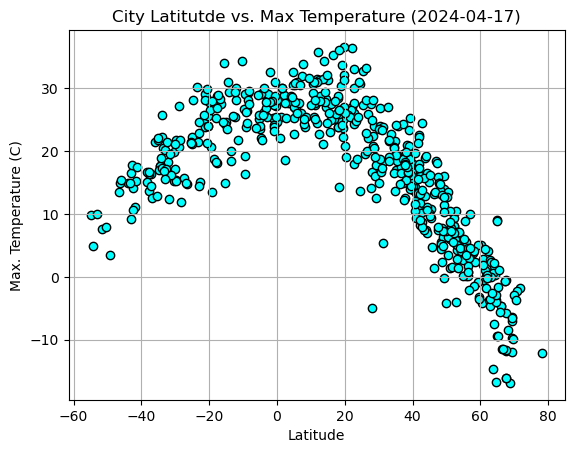

In [14]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df['Lat']
y_value = city_data_df['Max Temp']
plt.scatter(x_value, y_value,facecolors="aqua", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Max Temperature ({time.strftime('%Y-%m-%d', time.gmtime())})")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

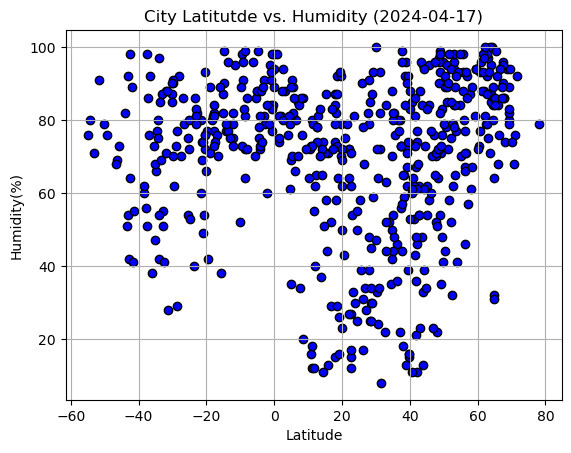

In [15]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df['Lat']
y_value = city_data_df['Humidity']
plt.scatter(x_value, y_value,facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Humidity ({time.strftime('%Y-%m-%d', time.gmtime())})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

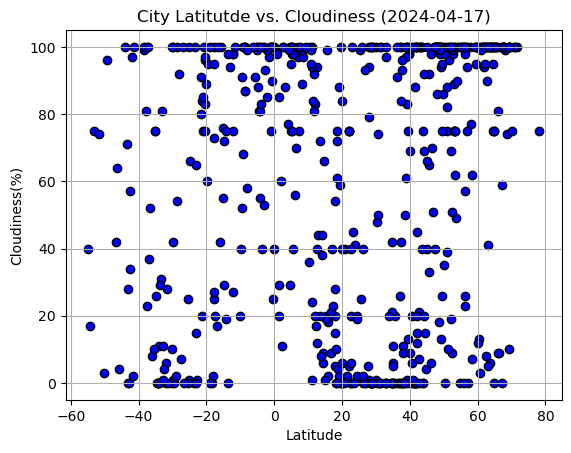

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df['Lat']
y_value = city_data_df['Cloudiness']
plt.scatter(x_value, y_value,facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Cloudiness ({time.strftime('%Y-%m-%d', time.gmtime())})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

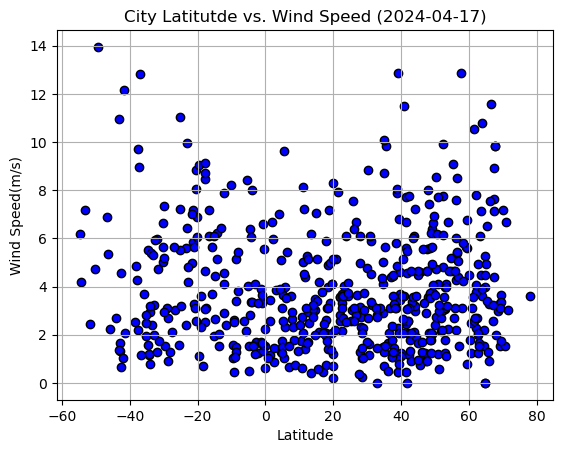

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df['Lat']
y_value = city_data_df['Wind Speed']
plt.scatter(x_value, y_value,facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Wind Speed ({time.strftime('%Y-%m-%d', time.gmtime())})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linregression(x_data, y_data,fit_x,fit_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    plt.scatter(x_data, y_data)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"the r value is: {round(rvalue,2)}")
    plt.annotate(line_eq,(fit_x,fit_y), fontsize=15,color="red")
    plt.plot(x_data,regress_values,"r-", label = line_eq)
    plt.xlabel(x_data.name)
    plt.ylabel(y_data.name)
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,28.10,78,94,2.94,YE,1713323223
2,colonia,50.9333,6.9500,5.97,90,75,4.12,DE,1713323223
3,broome,42.2506,-75.8330,8.32,74,15,1.14,US,1713323223
6,severo-yeniseyskiy,60.3725,93.0408,-4.12,73,13,1.79,RU,1713323478
7,tiksi,71.6872,128.8694,-1.77,92,100,3.04,RU,1713323224


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,14.90,82,100,2.68,NZ,1713323477
4,port-aux-francais,-49.3500,70.2167,3.47,76,96,13.95,TF,1713323477
5,west island,-12.1568,96.8225,29.99,79,75,4.12,CC,1713323224
11,edinburgh of the seven seas,-37.0676,-12.3116,16.41,76,37,12.82,SH,1713323225
16,ushuaia,-54.8000,-68.3000,9.81,76,40,6.17,AR,1713323226


###  Temperature vs. Latitude Linear Regression Plot

the r value is: -0.9


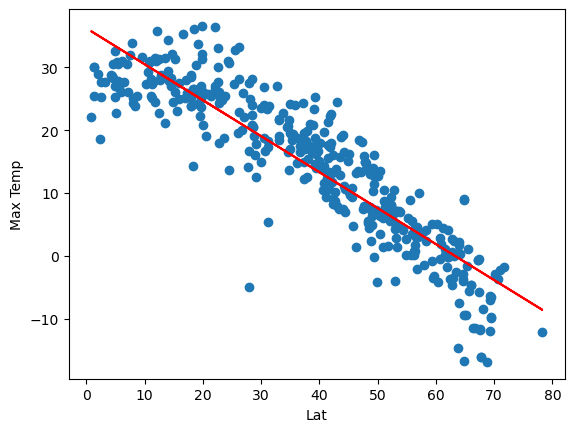

In [24]:
# Linear regression on Northern Hemisphere
linregression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],10,-30)

the r value is: 0.77


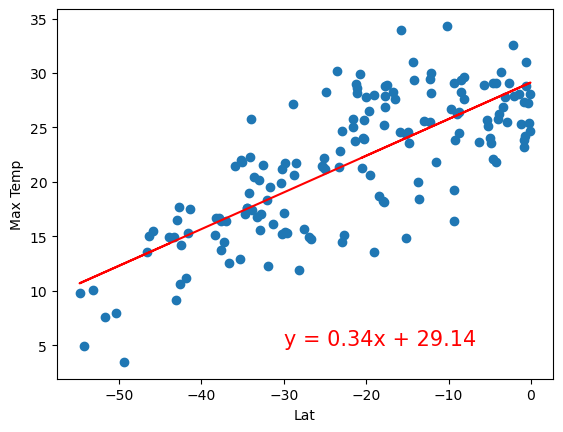

In [25]:
# Linear regression on Southern Hemisphere
linregression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],-30,5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


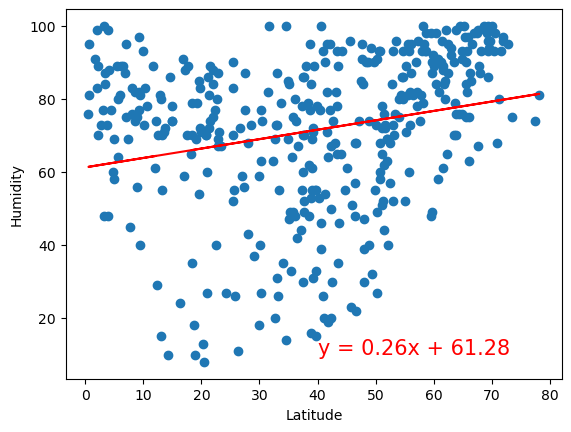

In [17]:
# Northern Hemisphere
linregression(northern_hemi_df['Lat'],northern_hemi_df["Humidity"],50,30)

The r-value is: 0.0002808747046324607


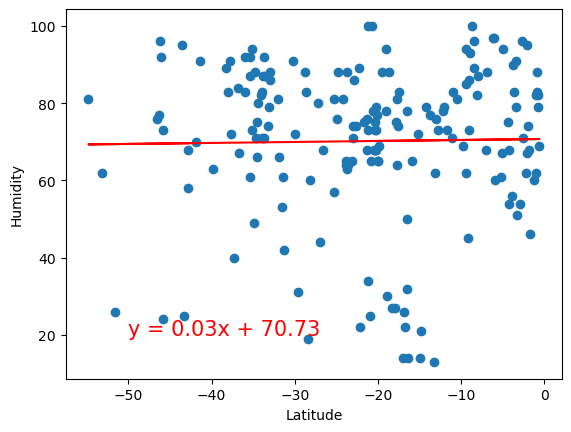

In [18]:
# Southern Hemisphere
linregression(southern_hemi_df['Lat'],southern_hemi_df["Humidity"],-20,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


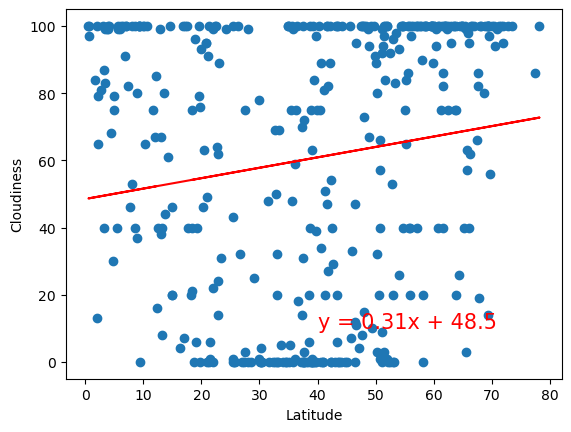

In [19]:
# Northern Hemisphere
linregression(northern_hemi_df['Lat'],northern_hemi_df["Cloudiness"],10,20)

The r-value is: 0.02056735429994368


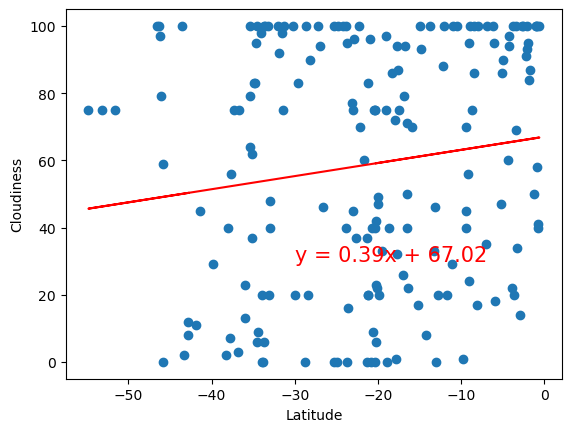

In [20]:
# Southern Hemisphere
linregression(southern_hemi_df['Lat'],southern_hemi_df["Cloudiness"],-50,20)

**Discussion about the linear relationship:** The r-values on two charts above are positively low, but based on the graphs, cloudiness does not have any relationship with latitude, regardless of Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


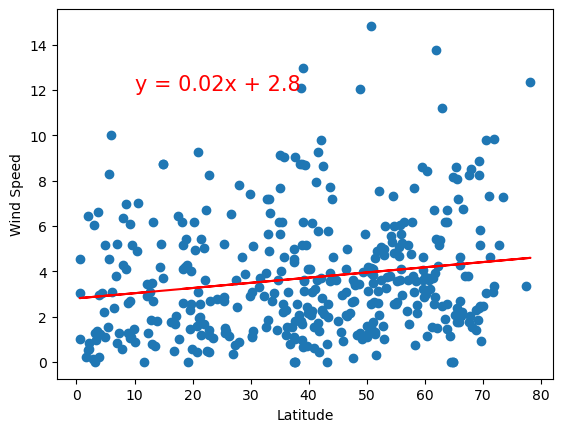

In [21]:
# Northern Hemisphere
linregression(northern_hemi_df['Lat'],northern_hemi_df["Wind Speed"],10,9)

the r value is: -0.17


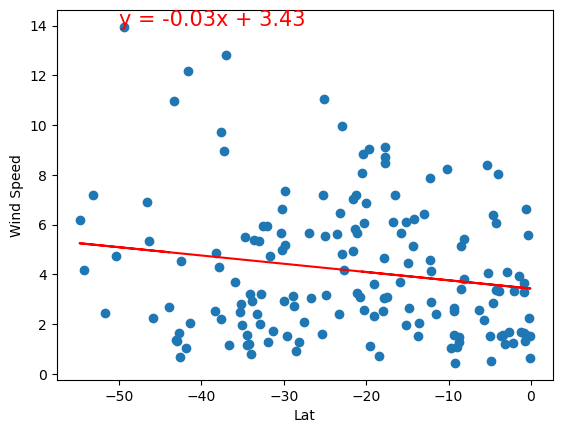

In [26]:
# Southern Hemisphere
linregression(southern_hemi_df['Lat'],southern_hemi_df["Wind Speed"],-50,14)

**Discussion about the linear relationship:** The r-value of the chart of the Northern Hemisphere displays that there is slight positive correlation between wind speed and latitiude. On the Southern Hemisphere, there is low negative correlation between wind speed and latitude.